In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import pandas as pd
import numpy as np
import pickle
import copy
import re
import matplotlib.pyplot as plt
from sklearn.externals import joblib

from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

## Loading Datasets

In [ ]:
pd.options.display.max_colwidth = 0

In [ ]:
#Loading Embedding Features DataFrame

mbert_train = pickle.load(open('/gdrive/MyDrive/3rd Sem/MTech CSE 3/Thesis/IIITD Fake News Project/Notebooks/Models/Our Baseline/Dataset Embeddings/mbert_train.pkl','rb'))
mbert_valid = pickle.load(open('/gdrive/MyDrive/3rd Sem/MTech CSE 3/Thesis/IIITD Fake News Project/Notebooks/Models/Our Baseline/Dataset Embeddings/mbert_validation.pkl','rb'))
mbert_test  = pickle.load(open('/gdrive/MyDrive/3rd Sem/MTech CSE 3/Thesis/IIITD Fake News Project/Notebooks/Models/Our Baseline/Dataset Embeddings/mbert_test.pkl','rb'))

In [ ]:
mbert_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,Hostile,Defamation,Fake,Hate,Offensive,Non-Hostile
0,0.075584,0.480334,0.207465,0.328606,-0.001583,0.986076,0.259885,0.313450,-0.244321,0.088728,0.040228,-0.406615,-0.504749,0.310509,0.222606,-0.143971,-0.199892,-0.420241,-0.253943,-0.144313,-0.163964,-0.669980,0.039402,-0.515764,0.702244,0.014536,-0.159491,0.435029,0.676164,0.258410,0.661097,0.027258,-0.541145,-0.350242,-0.041287,-0.343256,0.122189,0.507433,0.240462,-0.463764,...,-0.080981,0.711176,0.661375,-0.107603,-0.259271,-0.083384,0.327948,-0.736623,-0.182945,-0.225645,0.271816,-0.121758,-0.061584,0.179994,-0.287683,0.386665,-0.032580,-0.492006,-0.132161,-0.117685,-0.168342,-0.605335,-0.250327,0.049617,0.036441,0.552011,-0.353032,-0.033153,-0.479160,0.385022,-0.322094,-0.066316,-0.492159,-0.486937,1,0,0,1,1,0
1,-0.118905,0.228053,-0.107176,0.490232,0.064323,0.193036,-0.115965,0.182197,-0.033830,0.418321,-0.580961,-0.183495,-0.442750,-0.137044,0.832290,-0.011683,-0.100912,-0.162872,-0.248151,-0.105499,-0.078988,-0.184226,-0.190933,-0.587855,0.042618,-0.039224,-0.304879,-0.287771,0.666709,0.312562,0.186880,-0.143464,-0.849030,-0.094588,0.329206,-0.296587,0.136138,0.068638,0.148622,-0.297672,...,0.145548,-0.158586,-0.151615,0.398459,-0.599488,0.199375,-0.031982,-0.467552,-0.098465,-0.052053,-0.002969,-0.518265,-0.011382,0.019811,-0.344297,-0.044616,-0.226941,-0.270408,-0.133766,-0.231164,0.347956,-0.600360,-0.373046,0.087023,-0.074193,-0.570094,-0.411533,0.641706,-0.230593,0.029968,-0.275100,0.135672,-0.620829,-0.085859,0,0,0,0,0,1
2,-0.352412,0.891742,0.370846,0.738691,0.244717,-0.261234,-0.304924,0.394029,0.102821,0.460116,-0.736791,-0.375218,-0.648683,-0.159392,0.425843,-0.108971,-0.279309,-0.227840,0.113636,0.227143,0.124894,0.008834,-0.111008,-0.102820,0.491229,-0.361893,0.189791,0.176033,-0.018359,0.215636,0.016045,-0.338596,-0.092527,-0.432481,-0.098161,-0.020594,-0.055031,-0.048911,-0.039941,-0.622446,...,0.142103,-0.157460,0.423662,-0.005628,-0.131595,0.013594,-0.172776,-0.170781,-0.006833,0.215784,-0.004821,0.238154,0.322642,0.324871,-0.444282,0.642850,-0.339420,-0.227259,-0.107162,-0.267277,0.244657,-0.711058,-0.077447,-0.174185,0.037721,-0.190050,-0.100604,-0.016387,0.237433,-0.327698,0.425320,-0.159900,0.017658,-0.654000,0,0,0,0,0,1
3,-0.202523,0.112649,-0.079444,0.704449,0.648300,-0.111518,-0.267521,-0.383943,-0.531159,0.088185,-0.931027,0.327803,0.119692,-0.255418,0.344990,-0.514092,0.791562,-0.546443,-0.090807,-0.167629,-0.844062,0.358548,0.376295,-0.185450,-0.027491,0.185226,-0.340317,0.706004,0.905394,0.558966,-0.348059,-0.397845,0.530324,0.159405,0.967147,0.183775,0.626270,-0.282096,0.175645,0.233768,...,0.324490,0.128574,0.736698,-0.799551,-0.404538,-1.000451,0.231094,0.630886,-0.175561,0.610497,0.002208,-0.114702,-0.388164,0.934198,-0.085899,-0.782983,0.179997,-0.250842,0.034569,0.560693,0.841287,-0.481375,0.095945,-1.574304,0.596924,-0.602003,-0.603074,-0.248770,-0.256209,-1.173028,-0.206960,0.580640,-0.020738,0.101432,1,1,0,0,1,0
4,-0.186740,0.340729,0.133961,0.389023,0.148840,0.123022,0.013151,0.485828,0.156027,0.398113,-0.373687,-0.427570,-0.384739,-0.246714,0.908449,-0.219268,-0.199005,-0.184001,-0.288396,0.089997,0.118162,-0.133072,0.141761,-0.236784,0.477970,0.102205,-0.181945,-0.035385,0.650147,0.087995,0.055624,0.039921,-0.569286,-0.294644,0.009235,-0.301235,-0.122495,0.327218,0.257748,-0.556150,...,0.384445,-0.160819,-0.013044,0.228933,-0.493046,0.064510,-0.408671,-0.749835,-0.096949,0.133533,-0.134637,-0.149993,0.209405,-0.397121,-0.087614,0.210257,-0.381701,-0.422058,-0.116346,-0.185475,0.108368,-0.466941,-0.062735,-0.037566,-0.198277,-0.147195,-0.600615,0.355162,0.012961,0.369998,-0.535832,0.037708,-0.461856,-0.222959,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
mbert_valid

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,Hostile,Defamation,Fake,Hate,Offensive,Non-Hostile
5728,0.146154,0.547867,0.063385,0.704434,0.324381,0.833834,-0.404689,0.602847,0.199473,0.629237,-0.006619,-0.769648,-0.609856,-0.194881,0.641315,-0.377627,-0.484244,-0.457588,-0.041876,-0.494019,-0.176284,0.133694,-0.437161,-0.569604,0.752515,0.278638,-0.179575,0.390398,0.661422,0.454654,-0.225835,-0.433343,-0.269566,-0.264891,0.322374,-0.032127,0.594944,0.576833,-0.206191,-0.276645,...,0.763836,-0.031216,0.360816,-0.740703,0.121272,0.164624,-0.469453,-0.289827,-0.197744,-0.000304,-0.157638,-0.005018,0.114211,1.116369,-0.436943,-0.135787,-0.049272,0.462445,-0.194197,-0.000036,0.470343,-0.504394,0.145645,-0.124713,0.549788,0.157939,-0.634953,0.087418,0.018456,0.132502,0.290918,0.026339,-0.303839,-0.383785,0,0,0,0,0,1
5729,-0.020865,0.457289,0.046067,0.516731,0.546829,0.322691,-0.364778,0.828332,0.087844,0.169251,-1.032804,-0.603617,-0.129805,-0.035126,0.880602,0.380134,-0.522691,-0.280909,-0.087532,-0.484360,0.015131,0.865041,0.092222,-0.188068,-0.285638,-0.479068,0.251447,0.472543,0.791229,0.315534,0.203040,0.004173,0.207115,-0.182723,0.354502,-0.842335,0.190779,0.490406,-1.015756,-0.249433,...,0.102820,1.343572,-0.035489,-0.452084,0.011862,-0.192524,-0.231404,-0.335939,-0.026824,0.159585,-0.038497,0.022071,-0.143784,0.604021,0.133744,-0.081434,-0.308696,-0.097234,-0.347254,0.611380,-0.028486,-0.582309,0.812054,-0.219441,-0.028991,0.243647,-0.414992,0.163650,-0.058626,-0.717886,0.075236,0.044966,-0.421684,-0.392300,1,1,0,0,0,0
5730,0.230976,0.036649,-0.075142,-0.065840,0.146906,0.516475,-0.021493,0.541686,0.101149,-0.120511,-0.467725,-0.444756,-0.281426,-0.098609,0.637130,-0.063365,-0.380275,-0.018878,-0.482018,-0.317568,0.111027,0.225833,-0.054039,-0.424595,0.194544,0.038557,-0.186881,-0.193370,0.591999,0.369952,0.042418,0.026700,-0.466828,-0.187227,0.012854,0.081637,0.241296,0.093436,0.186451,-0.261995,...,0.130383,-0.085573,0.352275,0.158224,-0.092934,-0.096448,-0.012385,-0.334627,0.009309,0.026509,-0.142873,0.142987,0.088554,0.329843,0.381739,-0.086784,-0.178658,-0.062562,-0.267836,0.273469,0.094416,-0.281027,-0.046625,-0.050893,-0.272043,-0.104741,-0.260660,0.087023,0.107649,0.211713,-0.146863,-0.051275,-0.338718,0.225769,0,0,0,0,0,1
5731,-0.067285,0.318646,0.287195,0.429583,0.955036,0.128375,-0.229407,0.483078,-0.309762,0.182423,-0.168166,-0.210630,-0.526781,0.007643,0.693394,0.116122,-0.313474,-0.052754,0.544722,-0.204525,-0.605577,-0.109177,-0.194510,-0.440187,0.190682,-0.341889,-0.295024,0.332466,0.527684,0.529618,-0.005527,0.162179,0.187716,-0.561326,-0.120739,-0.178538,0.113795,0.338779,-0.279709,0.255666,...,0.252021,-0.240705,-0.056583,-0.357401,0.554875,0.010119,0.447929,0.079127,-0.245895,0.590331,0.469499,-0.493029,0.243888,0.259959,0.448458,-0.280845,-0.152394,0.161396,-0.179084,0.181374,-0.058510,0.040826,-0.280462,-0.313203,-0.448469,-0.003820,-0.473894,-0.233364,0.345859,-0.492485,-0.475212,-0.166962,-0.428719,-0.124557,0,0,0,0,0,1
5732,-0.005713,0.370628,0.074260,0.224970,0.196585,0.557196,0.193560,0.302086,0.263122,0.114698,-0.727378,-0.409346,-0.259106,-0.030030,0.224294,0.091040,-0.221557,0.098222,-0.091383,-0.433689,0.165605,-0.140828,0.011527,-0.424334,0.337225,0.174716,0.145304,-0.033985,0.538006,0.105201,0.221713,-0.253962,-0.165644,-0.385971,-0.146430,-0.045834,0.085191,0.109826,0.248408,-0.380577,...,0.184876,-0.049601,0.328135,0.057756,-0.364830,0.260973,0.145899,-0.549393,0.010121,0.209491,-0.065839,-0.003389,0.371818,0.163327,-0.026481,0.117203,-0.531748,-0.239056,-0.177844,-0.107374,0.135009,-0.086531,-0.114612,-0.092102,0.291820,-0.284852,-0.297935,0.035257,0.155845,0.418267,-0.401720,-0.039830,0.097472,-0.251344,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
mbert_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,Hostile,Defamation,Fake,Hate,Offensive,Non-Hostile
0,0.006830,0.946231,-0.641158,0.619838,0.694961,0.517429,-0.379015,-0.041129,0.000051,-0.244159,-1.052611,-0.417036,-0.722313,0.146258,1.036163,-0.439844,0.093705,-0.313039,0.096884,-0.488224,0.236894,-0.008080,0.238242,-0.272513,0.129411,0.061585,0.219535,0.111111,0.450430,0.648809,-0.168505,-0.278778,-0.278218,-0.336575,0.378141,-0.512152,0.192590,0.724074,-0.102495,-0.052583,...,0.201505,0.630924,-0.271822,-0.646619,0.106137,-0.309301,0.253092,0.051502,-0.694072,0.264012,0.018726,-0.625800,-0.199110,1.078778,-0.143337,0.339620,0.084705,0.255361,-0.015546,0.118042,0.441626,-0.140531,0.220585,-0.533909,0.642276,-0.047756,-0.518833,-0.034903,-0.499907,-0.443536,-0.516931,0.505032,-0.032807,-0.716809,1,1,1,0,1,0
1,-0.796325,0.596383,0.163296,0.558599,0.017358,0.415897,0.278327,-0.379494,-0.505482,0.749165,0.026286,1.381107,-0.563564,-0.880404,-0.191589,-0.950407,0.547850,0.095649,-0.593815,0.613969,-0.407992,-0.125304,0.390669,-0.797134,-0.541732,0.188136,0.514262,0.549993,0.370098,-0.067121,-0.214966,-0.246824,0.372583,-0.598925,0.978928,0.271284,0.001657,0.349763,-0.263357,0.139983,...,-0.147159,-0.368281,-0.079300,-0.404033,1.501366,-0.551260,-0.714101,-0.725403,0.064435,-0.007275,0.308212,-0.643522,-0.473227,1.523465,0.227053,-0.290262,-0.583964,-0.465579,0.100350,-0.922710,-0.132726,-0.064632,0.406067,-1.316130,0.939694,0.162582,0.017017,-0.157800,1.524447,-1.048248,-0.247183,-0.073546,0.180747,-0.402660,0,0,0,0,0,1
2,-0.065714,0.178092,-0.345013,1.189397,0.887853,0.069037,0.137444,-0.326618,-0.549797,-0.132336,-0.936266,-0.119456,-0.302939,0.163941,0.519057,-0.420130,0.620431,0.004303,-0.016443,0.003524,-0.238699,-0.055117,0.319513,0.048729,-0.005826,0.312394,-0.564614,0.353217,0.351224,0.225370,-0.028100,-0.399116,0.374154,-0.227308,0.980574,-0.211701,0.325123,0.411078,-0.305589,0.228409,...,0.793535,0.655460,-0.018758,0.016669,0.352054,-0.712506,-0.575344,0.019619,-0.114892,0.561547,0.717143,-0.488918,-0.326937,0.653166,-0.154476,-0.109777,-0.564031,-0.066827,0.049721,-0.053673,0.254807,0.003774,-0.246941,-0.563159,0.408953,-0.193528,0.009760,-0.095157,-0.077144,-1.220486,-0.829788,0.460426,-0.297551,-0.136495,1,0,0,1,0,0
3,-0.001764,0.563562,-0.042171,0.402255,0.651507,0.335758,0.349070,-0.374674,-0.781176,-0.249953,-0.294062,-0.153350,-0.138610,-0.018151,0.434741,-0.435789,0.777237,-0.373656,0.346920,0.115594,-0.588506,0.124046,0.338261,0.147891,-0.080168,0.054888,-0.499812,0.109151,0.564559,0.213554,0.232276,-0.450789,0.669921,-0.119463,0.973704,0.169791,0.429810,0.227202,-0.280491,-0.230959,...,-0.100902,0.678047,0.001182,0.220277,-0.292061,-0.396227,0.252048,0.116868,-0.087136,0.731065,0.085961,-0.422517,-0.674633,0.855087,0.250559,0.083324,-0.578281,-0.705467,-0.057555,-0.185140,0.505806,-0.204417,-0.022978,-0.790525,0.485377,-0.481925,-0.635875,0.248348,0.219490,-0.301428,-0.668045,0.523696,0.027587,-0.679461,1,0,1,0,0,0
4,-0.143109,0.277816,-0.023913,0.236307,0.037391,-0.003786,-0.154532,0.290910,-0.241245,0.232068,-0.372895,-0.344831,-0.350851,-0.342005,0.699067,-0.016718,-0.203136,-0.226214,-0.292117,-0.045766,-0.032751,0.313193,-0.052548,-0.531894,0.053330,-0.270113,-0.321302,-0.414390,0.482586,0.135390,0.240491,-0.008311,-0.516678,0.049237,0.358172,-0.220807,0.040912,0.046693,0.202318,-0.222310,...,0.134896,-0.376579,-0.136945,0.272135,-0.623186,0.063721,0.009007,-0.548392,-0.107450,-0.179296,-0.277677,-0.358788,0.100296,-0.352016,-0.079741,0.135091,-0.267246,-0.234140,-0.186241,-0.133011,0.325848,-0.400179,-0.225335,0.075455,-0.097932,-0.442151,-0.414269,0.589001,-0.097490,0.116761,-0.284689,0.290244,-0.404040,-0.054125,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

## Coarse Grained Hostility

In [ ]:
### We only need to use the Hostile column [-6] index for this
### Load the baseline model - SVM

print("Train set distribution:")
print(sum(mbert_train['Hostile']))
print(sum(mbert_train['Non-Hostile']))

print("\nValidation set distribution: ")
print(sum(mbert_valid['Hostile']))
print(sum(mbert_valid['Non-Hostile']))

print("\nTest set distribution: ")
print(sum(mbert_test['Hostile']))
print(sum(mbert_test['Non-Hostile']))


hostility_train  = np.asarray(mbert_train)
hostility_valid  = np.asarray(mbert_valid)
hostility_test   = np.asarray(mbert_test)


hostility_x_train = hostility_train[:,:-6]
hostility_y_train = hostility_train[:,-6]

hostility_x_valid = hostility_valid[:,:-6]
hostility_y_valid = hostility_valid[:,-6]

hostility_x_test  = hostility_test[:,:-6]
hostility_y_test  = hostility_test[:,-6]


print("\n\nhostility_x_train: ",hostility_x_train.shape)
print("hostility_y_train: ",hostility_y_train.shape)
print("\n\nhostility_x_valid: ",hostility_x_valid.shape)
print("hostility_y_valid: ",hostility_y_valid.shape)
print("\n\nhostility_x_test:  ",hostility_x_test.shape)
print("hostility_y_test:  ",hostility_y_test.shape)

Train set distribution:
2678
3050

Validation set distribution: 
376
435

Test set distribution: 
780
873


hostility_x_train:  (5728, 768)
hostility_y_train:  (5728,)


hostility_x_valid:  (811, 768)
hostility_y_valid:  (811,)


hostility_x_test:   (1653, 768)
hostility_y_test:   (1653,)


In [ ]:
### Load the baseline model - SVM
hostility_svm_clf = joblib.load("/gdrive/MyDrive/3rd Sem/MTech CSE 3/Thesis/IIITD Fake News Project/Notebooks/Models/Our Baseline/Models/hostility_clf.pkl")

### Validation Phase

In [ ]:
print("\n\nAccuracy report on validation set: ")
predict_valid = hostility_svm_clf.predict(hostility_x_valid)
print(classification_report(hostility_y_valid,predict_valid))
print(np.unique(predict_valid,return_counts = True))
f1 = f1_score(y_true=hostility_y_valid, y_pred=predict_valid, average='weighted')
print(f1)



Accuracy report on validation set: 
              precision    recall  f1-score   support

         0.0       0.87      0.83      0.85       435
         1.0       0.81      0.85      0.83       376

    accuracy                           0.84       811
   macro avg       0.84      0.84      0.84       811
weighted avg       0.84      0.84      0.84       811

(array([0., 1.]), array([418, 393]))
0.8411102523943486


Text(0.5, 62.15999999999998, 'Predicted label')

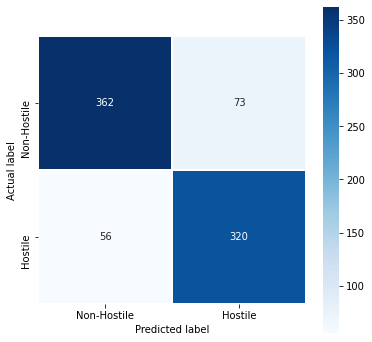

In [ ]:
cm = metrics.confusion_matrix(hostility_y_valid, predict_valid)
plt.figure(figsize=(6,6))
xticklabels = ['Non-Hostile', 'Hostile']
yticklabels = ['Non-Hostile', 'Hostile']
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues',xticklabels=xticklabels, yticklabels=yticklabels)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Test Phase

In [ ]:
print("\n\nAccuracy report on Test set: ")
predict_test = hostility_svm_clf.predict(hostility_x_test)
print(classification_report(hostility_y_test,predict_test))
print(np.unique(predict_test,return_counts = True))
f1 = f1_score(y_true=hostility_y_test, y_pred=predict_test, average='weighted')
print(f1)



Accuracy report on Test set: 
              precision    recall  f1-score   support

         0.0       0.86      0.83      0.85       873
         1.0       0.82      0.85      0.84       780

    accuracy                           0.84      1653
   macro avg       0.84      0.84      0.84      1653
weighted avg       0.84      0.84      0.84      1653

(array([0., 1.]), array([842, 811]))
0.8422164841418958


Text(0.5, 62.15999999999998, 'Predicted label')

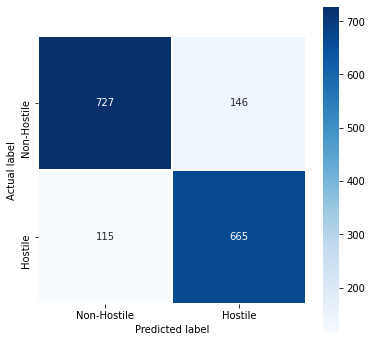

In [ ]:
cm = metrics.confusion_matrix(hostility_y_test, predict_test)
plt.figure(figsize=(6,6))
xticklabels = ['Non-Hostile', 'Hostile']
yticklabels = ['Non-Hostile', 'Hostile']
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues',xticklabels=xticklabels, yticklabels=yticklabels)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Fine Grained

In [ ]:
### We have trained each hostile dimension in hostile dataset and evaluation is also only done on hostile samples
fine_grained_train  = mbert_train[mbert_train.Hostile != 0]
fine_grained_valid  = mbert_valid[mbert_valid.Hostile != 0]
fine_grained_test   = mbert_test[mbert_test.Hostile   != 0]

In [ ]:
print("Fine-grained Train shape: ",fine_grained_train.shape)
print("Fine-grained Valid shape: ",fine_grained_valid.shape)
print("Fine-grained Test shape:  ",fine_grained_test.shape)

Fine-grained Train shape:  (2678, 774)
Fine-grained Valid shape:  (376, 774)
Fine-grained Test shape:   (780, 774)


### Defamation

In [ ]:
### Now we load our SVM baselines for each hostilie dimension

print("Train set distribution - Only Hostile samples are used for training:")
print("Defamation:     ", sum(fine_grained_train['Defamation']))
print("Non-Defamation: ",len(fine_grained_train) - sum(fine_grained_train['Defamation']))

print("\nValidation set distribution: ")
print("Defamation:     ",sum(fine_grained_valid['Defamation']))
print("Non-Defamation: ",len(fine_grained_valid) - sum(fine_grained_valid['Defamation']))

print("\nTest set distribution: ")
print("Defamation:     ",sum(fine_grained_test['Defamation']))
print("Non-Defamation: ",len(fine_grained_test) - sum(fine_grained_test['Defamation']))


defamation_train   = np.asarray(fine_grained_train)
defamation_valid   = np.asarray(fine_grained_valid)
defamation_test    = np.asarray(fine_grained_test)

defamation_x_train = defamation_train[:,:-6]
defamation_y_train = defamation_train[:,-5]

defamation_x_valid = defamation_valid[:,:-6]
defamation_y_valid = defamation_valid[:,-5]

defamation_x_test  = defamation_test[:,:-6]
defamation_y_test  = defamation_test[:,-5]



print("\n\ndefamation_x_train: ",defamation_x_train.shape)
print("defamation_y_train:  ",defamation_y_train.shape)
print("\n\ndefamation_x_valid: ",defamation_x_valid.shape)
print("defamation_y_valid:  ",defamation_y_valid.shape)
print("\n\ndefamation_x_test: ",defamation_x_test.shape)
print("defamation_y_test:  ",defamation_y_test.shape)

Train set distribution - Only Hostile samples are used for training:
Defamation:      564
Non-Defamation:  2114

Validation set distribution: 
Defamation:      77
Non-Defamation:  299

Test set distribution: 
Defamation:      169
Non-Defamation:  611


defamation_x_train:  (2678, 768)
defamation_y_train:   (2678,)


defamation_x_valid:  (376, 768)
defamation_y_valid:   (376,)


defamation_x_test:  (780, 768)
defamation_y_test:   (780,)


In [ ]:
### Load the baseline model - SVM
defamation_clf = joblib.load("/gdrive/MyDrive/3rd Sem/MTech CSE 3/Thesis/IIITD Fake News Project/Notebooks/Models/Our Baseline/Models/svm_defamation_clf.pkl")

#### Validation Phase

In [ ]:
print("\n\nAccuracy report on validation set: ")
predict_valid = defamation_clf.predict(defamation_x_valid)
print(classification_report(defamation_y_valid,predict_valid))
print(np.unique(predict_valid,return_counts = True))
f1 = f1_score(y_true=defamation_y_valid, y_pred=predict_valid, average=None)
print(f1)



Accuracy report on validation set: 
              precision    recall  f1-score   support

         0.0       0.89      0.59      0.71       299
         1.0       0.31      0.73      0.44        77

    accuracy                           0.61       376
   macro avg       0.60      0.66      0.57       376
weighted avg       0.77      0.61      0.65       376

(array([0., 1.]), array([196, 180]))
[0.70707071 0.43579767]


Text(0.5, 62.15999999999998, 'Predicted label')

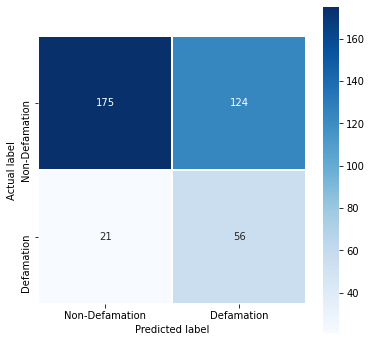

In [ ]:
cm = metrics.confusion_matrix(defamation_y_valid, predict_valid)
plt.figure(figsize=(6,6))
xticklabels = ['Non-Defamation', 'Defamation']
yticklabels = ['Non-Defamation', 'Defamation']
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues',xticklabels=xticklabels, yticklabels=yticklabels)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### Test Phase

In [ ]:
print("\n\nAccuracy report on Test set: ")
predict_test = defamation_clf.predict(defamation_x_test)
print(classification_report(defamation_y_test,predict_test))
print(np.unique(predict_test,return_counts = True))
f1 = f1_score(y_true=defamation_y_test, y_pred=predict_test, average=None)
print(f1)



Accuracy report on Test set: 
              precision    recall  f1-score   support

         0.0       0.85      0.60      0.70       611
         1.0       0.30      0.61      0.40       169

    accuracy                           0.60       780
   macro avg       0.57      0.61      0.55       780
weighted avg       0.73      0.60      0.64       780

(array([0., 1.]), array([433, 347]))
[0.70306513 0.39922481]


Text(0.5, 62.15999999999998, 'Predicted label')

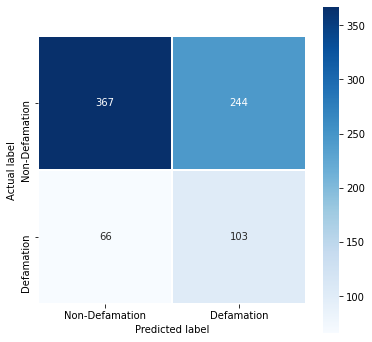

In [ ]:
cm = metrics.confusion_matrix(defamation_y_test, predict_test)
plt.figure(figsize=(6,6))
xticklabels = ['Non-Defamation', 'Defamation']
yticklabels = ['Non-Defamation', 'Defamation']
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues',xticklabels=xticklabels, yticklabels=yticklabels)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Fake

In [ ]:
### Now we load our SVM baselines for each hostilie dimension

print("Train set distribution - Only Hostile samples are used for training:")
print("fake:     ", sum(fine_grained_train['Fake']))
print("Non-fake: ",len(fine_grained_train) - sum(fine_grained_train['Fake']))

print("\nValidation set distribution: ")
print("fake:     ",sum(fine_grained_valid['Fake']))
print("Non-fake: ",len(fine_grained_valid) - sum(fine_grained_valid['Fake']))

print("\nTest set distribution: ")
print("fake:     ",sum(fine_grained_test['Fake']))
print("Non-fake: ",len(fine_grained_test) - sum(fine_grained_test['Fake']))


fake_train   = np.asarray(fine_grained_train)
fake_valid   = np.asarray(fine_grained_valid)
fake_test    = np.asarray(fine_grained_test)

fake_x_train = fake_train[:,:-6]
fake_y_train = fake_train[:,-4]

fake_x_valid = fake_valid[:,:-6]
fake_y_valid = fake_valid[:,-4]

fake_x_test  = fake_test[:,:-6]
fake_y_test  = fake_test[:,-4]



print("\n\nfake_x_train: ",fake_x_train.shape)
print("fake_y_train:  ",fake_y_train.shape)
print("\n\nfake_x_valid: ",fake_x_valid.shape)
print("fake_y_valid:  ",fake_y_valid.shape)
print("\n\nfake_x_test: ",fake_x_test.shape)
print("fake_y_test:  ",fake_y_test.shape)

Train set distribution - Only Hostile samples are used for training:
fake:      1144
Non-fake:  1534

Validation set distribution: 
fake:      160
Non-fake:  216

Test set distribution: 
fake:      334
Non-fake:  446


fake_x_train:  (2678, 768)
fake_y_train:   (2678,)


fake_x_valid:  (376, 768)
fake_y_valid:   (376,)


fake_x_test:  (780, 768)
fake_y_test:   (780,)


In [ ]:
### Load the baseline model - SVM
fake_clf = joblib.load("/gdrive/MyDrive/3rd Sem/MTech CSE 3/Thesis/IIITD Fake News Project/Notebooks/Models/Our Baseline/Models/svm_fake_clf.pkl")

#### Validation Phase

In [ ]:
print("\n\nAccuracy report on validation set: ")
predict_valid = fake_clf.predict(fake_x_valid)
print(classification_report(fake_y_valid,predict_valid))
print(np.unique(predict_valid,return_counts = True))
f1 = f1_score(y_true=fake_y_valid, y_pred=predict_valid, average=None)
print(f1)



Accuracy report on validation set: 
              precision    recall  f1-score   support

         0.0       0.75      0.80      0.77       216
         1.0       0.70      0.63      0.66       160

    accuracy                           0.73       376
   macro avg       0.72      0.72      0.72       376
weighted avg       0.73      0.73      0.73       376

(array([0., 1.]), array([232, 144]))
[0.77232143 0.66447368]


Text(0.5, 62.15999999999998, 'Predicted label')

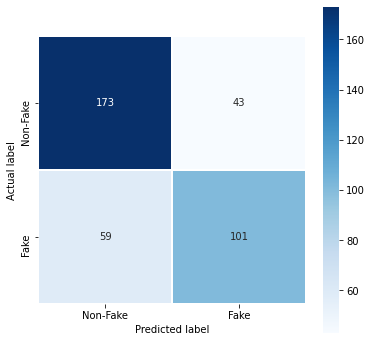

In [ ]:
cm = metrics.confusion_matrix(fake_y_valid, predict_valid)
plt.figure(figsize=(6,6))
xticklabels = ['Non-Fake', 'Fake']
yticklabels = ['Non-Fake', 'Fake']
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues',xticklabels=xticklabels, yticklabels=yticklabels)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### Test Phase

In [ ]:
print("\n\nAccuracy report on Test set: ")
predict_test = fake_clf.predict(fake_x_test)
print(classification_report(fake_y_test,predict_test))
print(np.unique(predict_test,return_counts = True))
f1 = f1_score(y_true=fake_y_test, y_pred=predict_test, average=None)
print(f1)



Accuracy report on Test set: 
              precision    recall  f1-score   support

         0.0       0.76      0.78      0.77       446
         1.0       0.70      0.68      0.69       334

    accuracy                           0.74       780
   macro avg       0.73      0.73      0.73       780
weighted avg       0.74      0.74      0.74       780

(array([0., 1.]), array([456, 324]))
[0.77161863 0.68693009]


Text(0.5, 62.15999999999998, 'Predicted label')

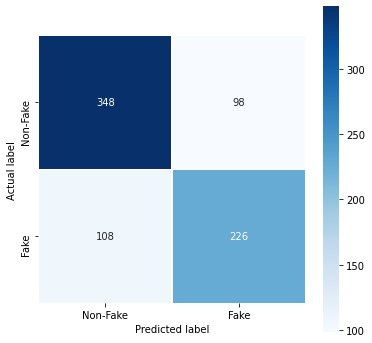

In [ ]:
cm = metrics.confusion_matrix(fake_y_test, predict_test)
plt.figure(figsize=(6,6))
xticklabels = ['Non-Fake', 'Fake']
yticklabels = ['Non-Fake', 'Fake']
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues',xticklabels=xticklabels, yticklabels=yticklabels)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Hate

In [ ]:
### Now we load our SVM baselines for each hostilie dimension

print("Train set distribution - Only Hostile samples are used for training:")
print("hate:     ", sum(fine_grained_train['Hate']))
print("Non-hate: ",len(fine_grained_train) - sum(fine_grained_train['Hate']))

print("\nValidation set distribution: ")
print("hate:     ",sum(fine_grained_valid['Hate']))
print("Non-hate: ",len(fine_grained_valid) - sum(fine_grained_valid['Hate']))

print("\nTest set distribution: ")
print("hate:     ",sum(fine_grained_test['Hate']))
print("Non-hate: ",len(fine_grained_test) - sum(fine_grained_test['Hate']))


hate_train   = np.asarray(fine_grained_train)
hate_valid   = np.asarray(fine_grained_valid)
hate_test    = np.asarray(fine_grained_test)

hate_x_train = hate_train[:,:-6]
hate_y_train = hate_train[:,-3]

hate_x_valid = hate_valid[:,:-6]
hate_y_valid = hate_valid[:,-3]

hate_x_test  = hate_test[:,:-6]
hate_y_test  = hate_test[:,-3]



print("\n\nhate_x_train: ",hate_x_train.shape)
print("hate_y_train:  ",hate_y_train.shape)
print("\n\nhate_x_valid: ",hate_x_valid.shape)
print("hate_y_valid:  ",hate_y_valid.shape)
print("\n\nhate_x_test: ",hate_x_test.shape)
print("hate_y_test:  ",hate_y_test.shape)

Train set distribution - Only Hostile samples are used for training:
hate:      792
Non-hate:  1886

Validation set distribution: 
hate:      110
Non-hate:  266

Test set distribution: 
hate:      234
Non-hate:  546


hate_x_train:  (2678, 768)
hate_y_train:   (2678,)


hate_x_valid:  (376, 768)
hate_y_valid:   (376,)


hate_x_test:  (780, 768)
hate_y_test:   (780,)


In [ ]:
### Load the baseline model - SVM
hate_clf = joblib.load("/gdrive/MyDrive/3rd Sem/MTech CSE 3/Thesis/IIITD Fake News Project/Notebooks/Models/Our Baseline/Models/svm_hate_clf.pkl")

#### Validation Phase

In [ ]:
print("\n\nAccuracy report on validation set: ")
predict_valid = hate_clf.predict(hate_x_valid)
print(classification_report(hate_y_valid,predict_valid))
print(np.unique(predict_valid,return_counts = True))
f1 = f1_score(y_true=hate_y_valid, y_pred=predict_valid, average=None)
print(f1)



Accuracy report on validation set: 
              precision    recall  f1-score   support

         0.0       0.79      0.56      0.65       266
         1.0       0.38      0.65      0.47       110

    accuracy                           0.58       376
   macro avg       0.58      0.60      0.56       376
weighted avg       0.67      0.58      0.60       376

(array([0., 1.]), array([187, 189]))
[0.65342163 0.47491639]


In [ ]:
cm = metrics.confusion_matrix(hate_y_valid, predict_valid)
plt.figure(figsize=(6,6))
xticklabels = ['Non-hate', 'hate']
yticklabels = ['Non-hate', 'hate']
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues',xticklabels=xticklabels, yticklabels=yticklabels)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### Test Phase

In [ ]:
print("\n\nAccuracy report on Test set: ")
predict_test = hate_clf.predict(hate_x_test)
print(classification_report(hate_y_test,predict_test))
print(np.unique(predict_test,return_counts = True))
f1 = f1_score(y_true=hate_y_test, y_pred=predict_test, average=None)
print(f1)



Accuracy report on Test set: 
              precision    recall  f1-score   support

         0.0       0.79      0.58      0.67       546
         1.0       0.40      0.65      0.49       234

    accuracy                           0.60       780
   macro avg       0.60      0.61      0.58       780
weighted avg       0.67      0.60      0.62       780

(array([0., 1.]), array([401, 379]))
[0.67159451 0.49265905]


Text(0.5, 62.15999999999998, 'Predicted label')

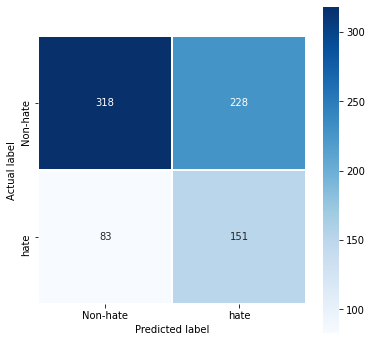

In [ ]:
cm = metrics.confusion_matrix(hate_y_test, predict_test)
plt.figure(figsize=(6,6))
xticklabels = ['Non-hate', 'hate']
yticklabels = ['Non-hate', 'hate']
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues',xticklabels=xticklabels, yticklabels=yticklabels)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Offensive

In [ ]:
### Now we load our SVM baselines for each hostilie dimension

print("Train set distribution - Only Hostile samples are used for training:")
print("offensive:     ", sum(fine_grained_train['Offensive']))
print("Non-offensive: ",len(fine_grained_train) - sum(fine_grained_train['Offensive']))

print("\nValidation set distribution: ")
print("offensive:     ",sum(fine_grained_valid['Offensive']))
print("Non-offensive: ",len(fine_grained_valid) - sum(fine_grained_valid['Offensive']))

print("\nTest set distribution: ")
print("offensive:     ",sum(fine_grained_test['Offensive']))
print("Non-offensive: ",len(fine_grained_test) - sum(fine_grained_test['Offensive']))


offensive_train   = np.asarray(fine_grained_train)
offensive_valid   = np.asarray(fine_grained_valid)
offensive_test    = np.asarray(fine_grained_test)

offensive_x_train = offensive_train[:,:-6]
offensive_y_train = offensive_train[:,-2]

offensive_x_valid = offensive_valid[:,:-6]
offensive_y_valid = offensive_valid[:,-2]

offensive_x_test  = offensive_test[:,:-6]
offensive_y_test  = offensive_test[:,-2]



print("\n\noffensive_x_train: ",offensive_x_train.shape)
print("offensive_y_train:  ",offensive_y_train.shape)
print("\n\noffensive_x_valid: ",offensive_x_valid.shape)
print("offensive_y_valid:  ",offensive_y_valid.shape)
print("\n\noffensive_x_test: ",offensive_x_test.shape)
print("offensive_y_test:  ",offensive_y_test.shape)

Train set distribution - Only Hostile samples are used for training:
offensive:      742
Non-offensive:  1936

Validation set distribution: 
offensive:      103
Non-offensive:  273

Test set distribution: 
offensive:      219
Non-offensive:  561


offensive_x_train:  (2678, 768)
offensive_y_train:   (2678,)


offensive_x_valid:  (376, 768)
offensive_y_valid:   (376,)


offensive_x_test:  (780, 768)
offensive_y_test:   (780,)


In [ ]:
### Load the baseline model - SVM
offensive_clf = joblib.load("/gdrive/MyDrive/3rd Sem/MTech CSE 3/Thesis/IIITD Fake News Project/Notebooks/Models/Our Baseline/Models/svm_offensive_clf.pkl")

#### Validation Phase

In [ ]:
print("\n\nAccuracy report on validation set: ")
predict_valid = offensive_clf.predict(offensive_x_valid)
print(classification_report(offensive_y_valid,predict_valid))
print(np.unique(predict_valid,return_counts = True))
f1 = f1_score(y_true=offensive_y_valid, y_pred=predict_valid, average=None)
print(f1)



Accuracy report on validation set: 
              precision    recall  f1-score   support

         0.0       0.78      0.62      0.69       273
         1.0       0.35      0.53      0.42       103

    accuracy                           0.60       376
   macro avg       0.56      0.58      0.55       376
weighted avg       0.66      0.60      0.62       376

(array([0., 1.]), array([217, 159]))
[0.68979592 0.41984733]


Text(0.5, 62.15999999999998, 'Predicted label')

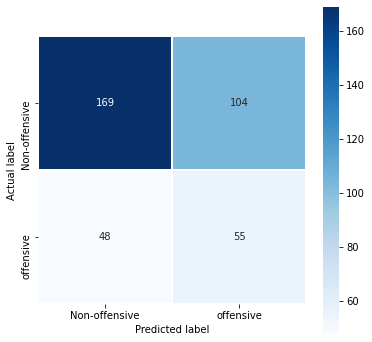

In [ ]:
cm = metrics.confusion_matrix(offensive_y_valid, predict_valid)
plt.figure(figsize=(6,6))
xticklabels = ['Non-offensive', 'offensive']
yticklabels = ['Non-offensive', 'offensive']
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues',xticklabels=xticklabels, yticklabels=yticklabels)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### Test Phase

In [ ]:
print("\n\nAccuracy report on Test set: ")
predict_test = offensive_clf.predict(offensive_x_test)
print(classification_report(offensive_y_test,predict_test))
print(np.unique(predict_test,return_counts = True))
f1 = f1_score(y_true=offensive_y_test, y_pred=predict_test, average=None)
print(f1)



Accuracy report on Test set: 
              precision    recall  f1-score   support

         0.0       0.82      0.66      0.73       561
         1.0       0.42      0.62      0.50       219

    accuracy                           0.65       780
   macro avg       0.62      0.64      0.62       780
weighted avg       0.70      0.65      0.67       780

(array([0., 1.]), array([457, 323]))
[0.73280943 0.49815498]


Text(0.5, 62.15999999999998, 'Predicted label')

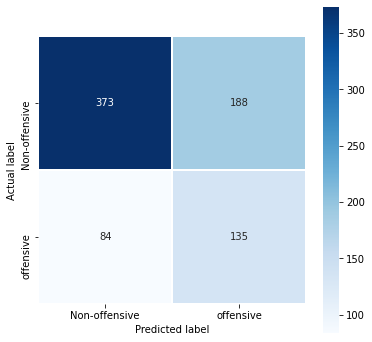

In [ ]:
cm = metrics.confusion_matrix(offensive_y_test, predict_test)
plt.figure(figsize=(6,6))
xticklabels = ['Non-offensive', 'offensive']
yticklabels = ['Non-offensive', 'offensive']
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues',xticklabels=xticklabels, yticklabels=yticklabels)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')